## Task 3 - Sales Prediction Using Python
### By Saad Bin Farooq

### Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading Data and EDA (Explolatory Data Analysis)

In [2]:
data = pd.read_csv('Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
data = data.drop('Unnamed: 0', axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

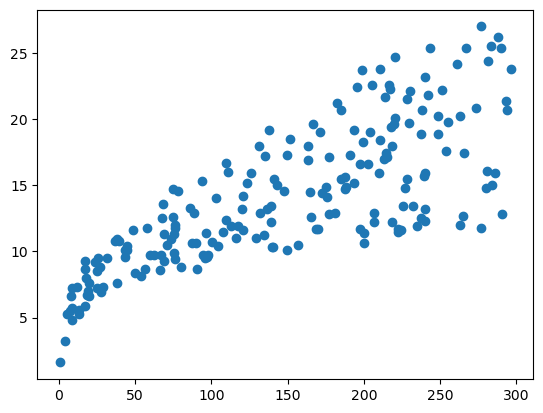

In [5]:
plt.scatter(data['TV'], data['Sales'])

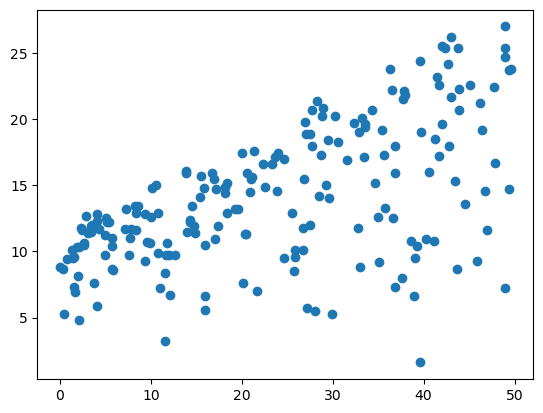

In [6]:
plt.scatter(data['Radio'], data['Sales'])

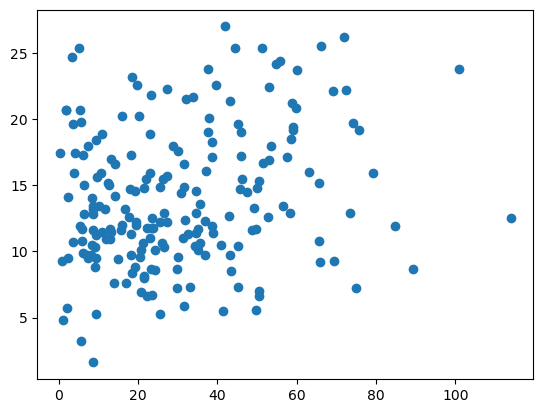

In [7]:
plt.scatter(data['Newspaper'], data['Sales'])

In [8]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


### Model Selection and Evaluation

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [10]:
X = data.drop('Sales', axis = 1)
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

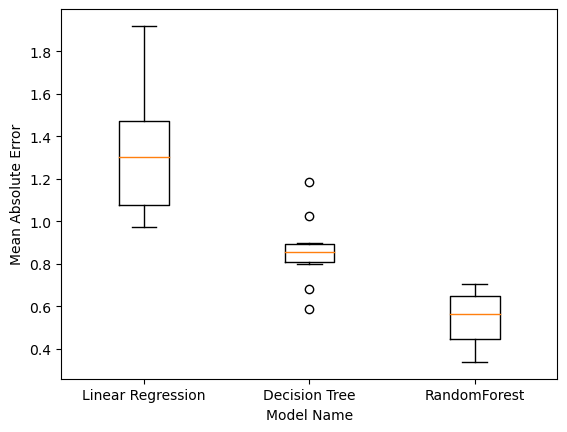

In [11]:
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]
names = ['Linear Regression', 'Decision Tree', 'RandomForest']
results = []

for model in models:
    
    result = cross_val_score(model, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 10)
    results.append(-1 * result)

plt.boxplot(results, labels = names)
plt.xlabel('Model Name')
plt.ylabel('Mean Absolute Error')
plt.show()

In [12]:
model = RandomForestRegressor(n_estimators = 300)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('MAE: ', mean_absolute_error(y_pred, y_test))
print('MSE: ', mean_squared_error(y_pred, y_test))
print('R2 Score: ', r2_score(y_pred, y_test))

MAE:  0.4369416666666714
MSE:  0.3345123972222289
R2 Score:  0.9828622466803217
